## **Predição de Preços Médios de Casas na Califórnia**
---
O objetivo desse projeto é prever o preço médio das casas na califórnia a partir de alguns indicadores comuns para precificação.

---
O banco de dados possui os seguintes indicadores:





*   longitute (Longitude)- Uma medida de quão longe a oeste está uma casa; um valor mais;    
    alto está mais a oeste)
*   latitude (Latitude) - Uma medida de quão longe a oeste está uma casa; um valor mais alto está mais a oeste;
*   housingMedianAge (Tempo de Construção da Casa) - Idade média de uma casa dentro de um quarteirão; um número menor é um edifício mais novo;
*   totalRooms (Quartos totais) - Número total de quartos dentro de um bloco;
*   totalBedrooms (Dormitórios Totais) - Número total de quartos dentro de um quarteirão;
*   population (População) - Número total de pessoas que residem em um quarteirão
*   households (Famílias) - Número total de domicílios, um grupo de pessoas que residem em uma unidade domiciliar, para um quarteirão
*   medianIncome (Renda Média) - Renda média das famílias dentro de um quarteirão (medida em dezenas de milhares de dólares americanos)
*    medianHouseValue (Valor Médio da Casa) - Valor médio da casa para famílias dentro de um quarteirão (medido em dólares americanos)
*   oceanProximity (Proximidade do Oceano) - Location of the house w.r.t ocean/sea

Os dados foram extraídos do [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices?select=housing.csv)

Feito por: Whendel Muniz dos Santos

E-mail: whendel.muniz@ufpe.br

##Importação e Instalação de Bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
sb.set_style('whitegrid')
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

## Carregamento e Primeira Análise dos Dados

In [ ]:
house = pd.read_csv('/content/housing.csv') #Carregamento da base de dados
house

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
house.isnull().sum() #Visualizar quantos dados nulos tem em cada coluna. Nesse caso, há 207 dados faltantes na coluna de dormitórios totais.

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
house['ocean_proximity'].unique() #Visualização dos tipos de resposta na coluna de proximidade do oceano. Esses valores categóricos nominais precisarão ser substituídos por valores numéricos para serem lidos no Aprendizado de Máquina.

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [ ]:
house['ocean_proximity'].value_counts() #Quantidade de respostas para cada categoria da coluna de proximidade do oceano.

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
house_novo = house.copy()

In [ ]:
house_novo

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
house_novo = pd.get_dummies(house_novo, columns= ['ocean_proximity']) #Transformação da coluna em valores numéricos

In [ ]:
house_novo

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


In [ ]:
house_novo.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [ ]:
house_novo = house_novo[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN', 'median_house_value']] #Realocação do Target para o fim (no caso, o valor médio das casas)

In [ ]:
house_novo

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0,342200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,0,1,0,0,0,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,0,1,0,0,0,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,0,1,0,0,0,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,0,1,0,0,0,84700.0


## Tratamento de Dados Faltantes



---
Como são poucos dados nulos em comparação com a quantidade de linhas totais, os dados nulos serão substituídos pela média dos dados não-nulos.


In [ ]:
house_novo['total_bedrooms'].mean()

537.8705525375618

In [ ]:
house_novo['total_bedrooms'] = house_novo['total_bedrooms'].fillna(house_novo['total_bedrooms'].mean()) #Preenchimento dos dados faltantes pela média dos dados não faltantes.

In [ ]:
house_novo.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
ocean_proximity_<1H OCEAN     0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
median_house_value            0
dtype: int64

##Retirada de Outliers

In [ ]:
from scipy import stats
z_scores = np.abs(stats.zscore(house_novo))
threshold = 3
outlier_mask = (z_scores > threshold).any(axis=1)
house_atualizado = house_novo[~outlier_mask]
#Preparação para retirar os outliers da base de dados.


---
O método z-score identifica a distância dos pontos da média dos dados de cada coluna com relação ao desvio padrão. O threshold é um valor crítico que é utilizado como referência, ou seja, o valor a mais ou a menos que threshold é considerado um outlier. Foi utilizado o 2 como valor crítico comum e o resutado de comparação pode ser visto abaixo.


---



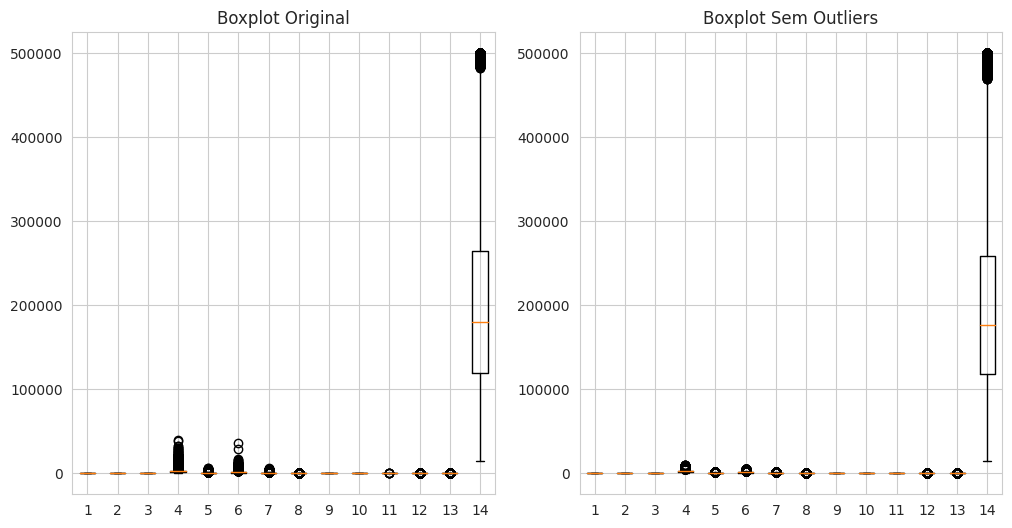

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(house_novo)
plt.title('Boxplot Original')
plt.subplot(1, 2, 2)
plt.boxplot(house_atualizado)
plt.title('Boxplot Sem Outliers')
plt.show()

##Verificação de Modelos de Machine Learning

In [ ]:
c1 = house_atualizado.drop('median_house_value' , axis = 1) #Tabela sem o target (meta de aprendizado)
c2 = house_atualizado['median_house_value'] #Tabela apenas com o target (meta de aprendizado)

In [ ]:
c1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,0,1,0,0,0


In [ ]:
c2

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 19741, dtype: float64

In [ ]:
c1_train, c1_test, c2_train, c2_test = train_test_split(c1,c2, test_size =0.33, random_state = 42) #criação dos dados de treino e teste

In [ ]:
modelosReg = {
    'LinearRegression': LinearRegression(),
    'RandomForestRegressor': RandomForestRegressor(),
    'ElasticNet': ElasticNet(),
    'SVR': SVR(),
    'Ridge': Ridge(),
    'BayesianRidge': BayesianRidge()
}

In [ ]:
modeloReg_r2 = []
modeloReg_rmse = []
modeloReg_nomes = []

for nome, modelo in modelosReg.items():
    fit_modelo = modelo.fit(c1_train, c2_train)
    predicao = fit_modelo.predict(c1_test)

    modeloReg_r2.append(r2_score(c2_test, predicao))
    modeloReg_rmse.append(np.sqrt(mean_squared_error(c2_test, predicao)))
    modeloReg_nomes.append(nome)

    resultado_final = pd.DataFrame([modeloReg_nomes, modeloReg_r2, modeloReg_rmse]).T
    resultado_final = resultado_final.rename(columns={0:'Modelo', 1: 'R2', 2:'RMSE'}).sort_values(by = 'RMSE')

resultado_final

,Modelo,R2,RMSE
1,RandomForestRegressor,0.806112,48642.61468
5,BayesianRidge,0.640016,66280.123116
4,Ridge,0.640009,66280.773012
0,LinearRegression,0.640008,66280.835705
2,ElasticNet,0.610441,68949.08622
3,SVR,-0.054244,113425.906678



*R² (Coeficiente de Determinação)*:
O R² mede a proporção da variabilidade na variável de resposta (a variável que estamos tentando prever) que é explicada pelo modelo de regressão. Ele fornece uma medida de quão bem o modelo se ajusta aos dados. O R² varia de 0 a 1, onde 0 significa que o modelo não explica nenhuma variabilidade e 1 significa que o modelo explica toda a variabilidade. Portanto, quanto mais próximo o R² estiver de 1, melhor o modelo se ajusta aos dados. O R² é uma medida relativa de ajuste do modelo e ajuda a avaliar a qualidade global do modelo.

*RMSE (Erro Quadrático Médio)*:
O RMSE mede a média dos erros (diferenças entre os valores previstos pelo modelo e os valores reais) ao quadrado. Ele fornece uma medida absoluta da qualidade do ajuste do modelo aos dados. Quanto menor o RMSE, melhor o modelo está se ajustando aos dados, pois indica que os erros médios são menores. O RMSE é útil para avaliar a precisão das previsões do modelo e é uma métrica mais sensível a erros grandes, uma vez que eles são elevados ao quadrado.